# Weather Data Visualization

This notebook focuses on exploratory data analysis of the cleaned weather dataset through visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

## 1. Load Cleaned Data

In [4]:
# Load the cleaned weather data
df = pd.read_csv("../../data/processed/weather/NewYork_Weather 2023-01-01 to 2025-03-03_Cleaned.csv")

# Convert datetime columns back to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])

print(f"Data shape: {df.shape}")
df.head()

Data shape: (793, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,NewYork,2023-01-01,24.0,10.0,16.7,24.0,10.0,16.7,9.7,65.2,...,16.8,7,10,2023-01-01 07:06:52,2023-01-01 17:53:11,0.30,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
1,NewYork,2023-01-02,22.0,8.0,15.4,22.0,7.9,15.3,8.2,64.1,...,17.2,7,10,2023-01-02 07:07:10,2023-01-02 17:53:49,0.34,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
2,NewYork,2023-01-03,20.7,9.0,14.7,20.7,7.3,14.6,7.7,64.5,...,17.2,7,10,2023-01-03 07:07:28,2023-01-03 17:54:28,0.37,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
3,NewYork,2023-01-04,19.0,7.0,13.0,19.0,4.8,12.6,6.1,65.6,...,17.4,7,10,2023-01-04 07:07:44,2023-01-04 17:55:08,0.41,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
4,NewYork,2023-01-05,19.0,8.0,13.5,19.0,5.3,12.8,8.2,71.2,...,14.5,6,10,2023-01-05 07:07:58,2023-01-05 17:55:48,0.44,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"


## 2. Temperature Analysis

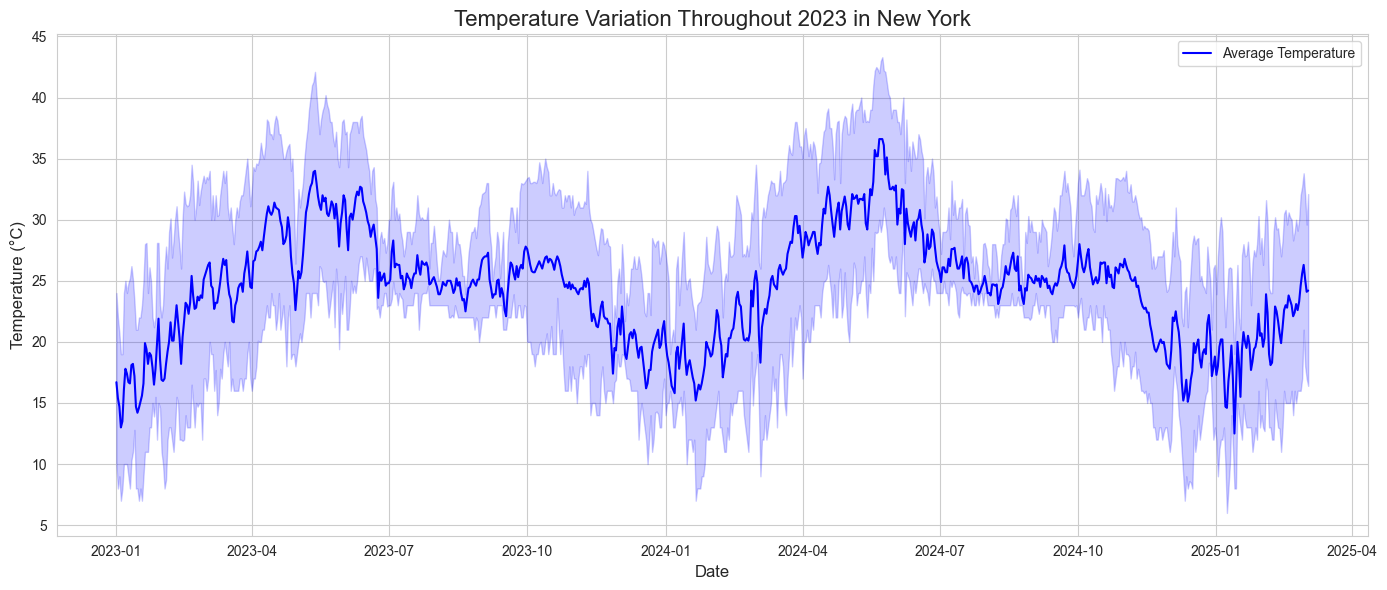

In [5]:
# Plot temperature variations throughout the year
plt.figure(figsize=(14, 6))
plt.plot(df['datetime'], df['temp'], label='Average Temperature', color='blue')
plt.fill_between(df['datetime'], df['tempmin'], df['tempmax'], alpha=0.2, color='blue')
plt.title('Temperature Variation Throughout 2023 in New York')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Monthly temperature statistics
df['month'] = df['datetime'].dt.month
monthly_temps = df.groupby('month').agg({
    'temp': ['mean', 'min', 'max', 'std'],
    'tempmin': ['mean', 'min'],
    'tempmax': ['mean', 'max']
})

# Convert month numbers to names
monthly_temps.index = [calendar.month_name[m] for m in monthly_temps.index]
monthly_temps

temp                          tempmin          tempmax      
                mean   min   max       std       mean   min       mean   max
January    17.841935  12.5  22.3  2.027706  11.598925   6.0  24.644086  30.3
February   21.600000  16.8  26.3  2.107074  13.955294   8.0  29.027059  34.5
March      25.106154  18.3  30.3  2.294414  17.146154   9.0  32.476923  38.0
April      29.071667  22.6  32.7  1.999923  21.760000  16.0  35.913333  39.1
May        31.530645  24.1  36.6  2.639957  24.609677  19.0  38.459677  43.3
June       29.245000  23.6  32.8  2.288988  24.663333  21.0  34.680000  40.0
July       25.733871  23.9  28.3  0.995884  23.596774  21.0  29.164516  33.2
August     24.714516  22.5  27.3  0.927158  22.509677  20.0  27.937097  32.0
September  25.256667  22.1  27.9  1.180831  22.400000  20.0  29.658333  34.0
October    25.970968  24.3  28.0  0.876354  19.951613  16.0  32.393548  35.0
November   22.420000  17.4  26.8  2.313029  15.941667  12.0  28.808333  34.0
December   19.314516  15.1  22.9  1.883217  13.890323   7.0  25.745161  31.0

/var/folders/vd/cd4zmcw90v70cv08nvjpv1kr0000gn/T/ipykernel_39620/3834055808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month_name', y='temp', data=df, order=month_order, palette='coolwarm')


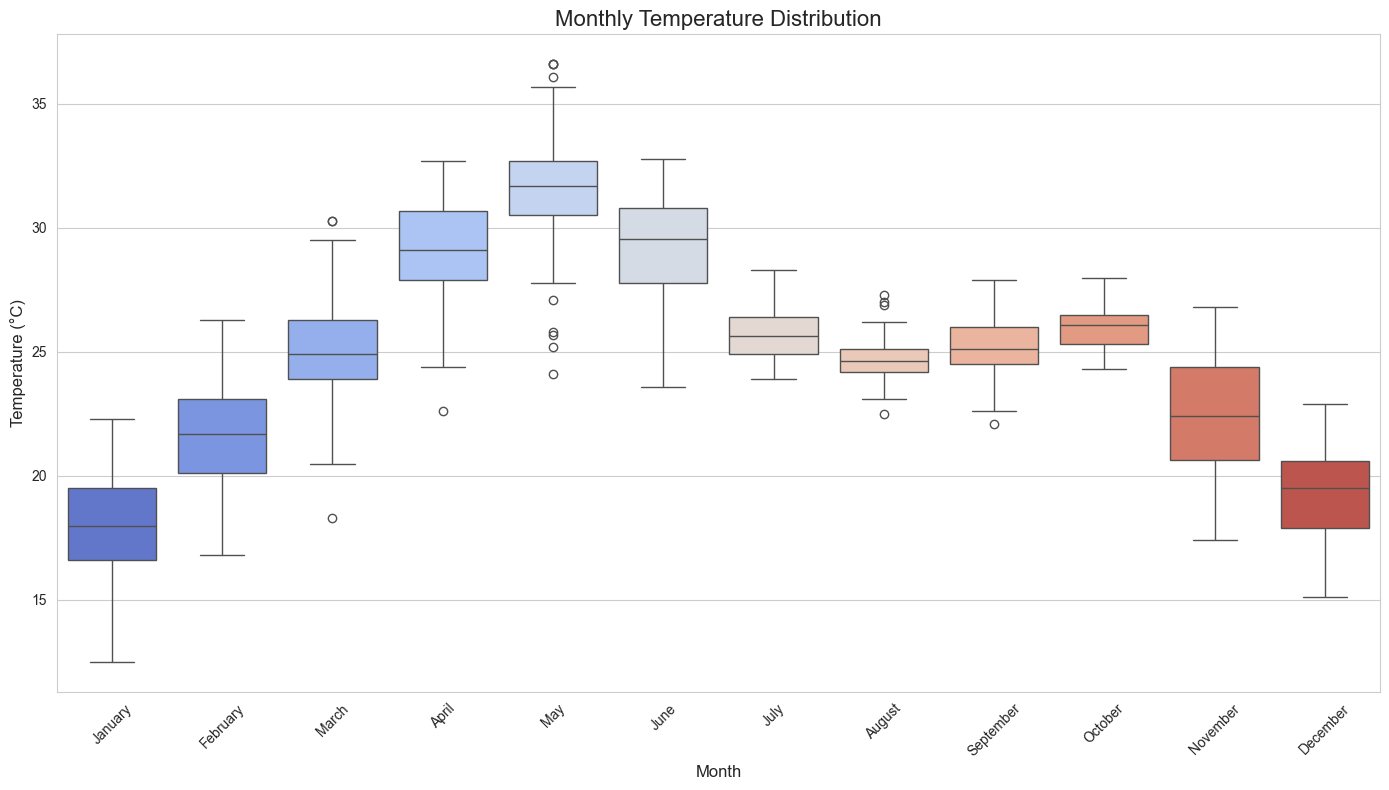

In [7]:
# Monthly temperature boxplot
plt.figure(figsize=(14, 8))
df['month_name'] = df['datetime'].dt.strftime('%B')
month_order = [calendar.month_name[i] for i in range(1, 13)]
sns.boxplot(x='month_name', y='temp', data=df, order=month_order, palette='coolwarm')
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Precipitation Analysis

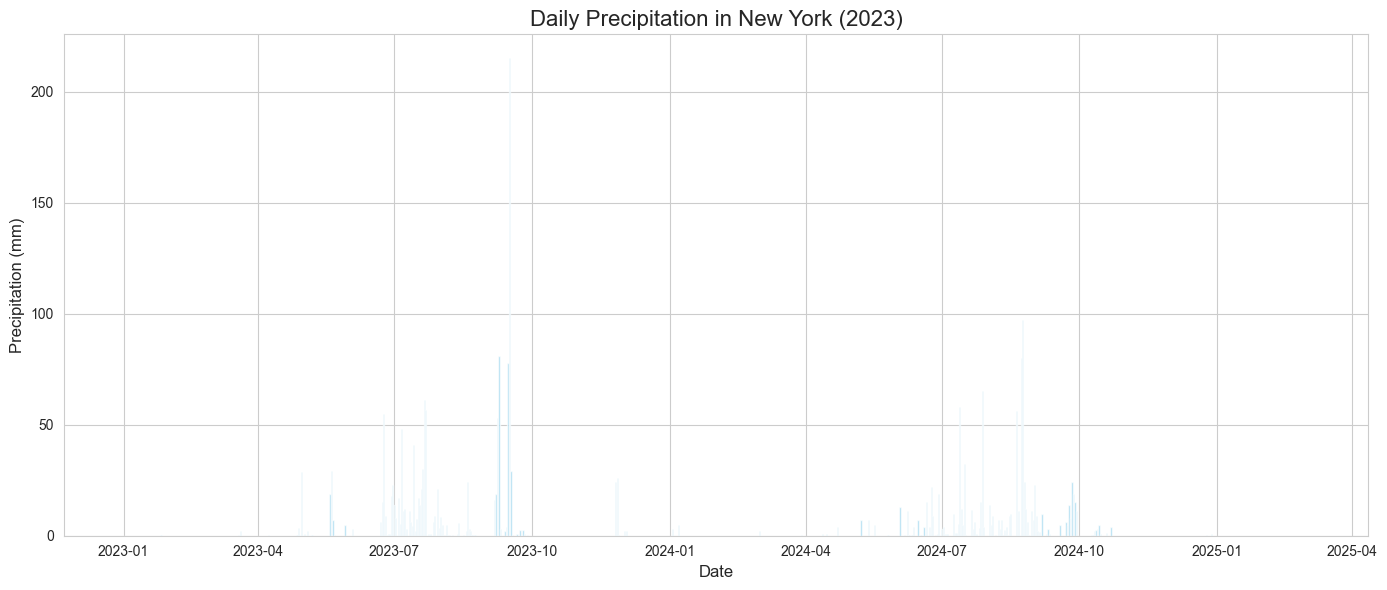

In [8]:
# Plot precipitation throughout the year
plt.figure(figsize=(14, 6))
plt.bar(df['datetime'], df['precip'], width=0.8, alpha=0.7, color='skyblue')
plt.title('Daily Precipitation in New York (2023)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [9]:
# Monthly precipitation statistics
monthly_precip = df.groupby('month').agg({
    'precip': ['sum', 'mean', 'max', 'count'],
    'precipprob': 'mean'
})

# Count days with precipitation
rainy_days = df[df['precip'] > 0].groupby('month').size()
monthly_precip['rainy_days'] = rainy_days

# Convert month numbers to names
monthly_precip.index = [calendar.month_name[m] for m in monthly_precip.index]
monthly_precip

precip                         precipprob rainy_days
             sum       mean    max count       mean           
January      8.2   0.088172    5.0    93   3.225806        3.0
February     0.0   0.000000    0.0    85   0.000000        NaN
March        4.6   0.070769    2.0    65   9.230769        6.0
April       39.3   0.655000   28.9    60  15.000000        9.0
May         83.5   1.346774   29.0    62  24.193548       15.0
June       242.1   4.035000   55.0    60  50.000000       30.0
July       676.0  10.903226   65.0    62  87.096774       54.0
August     434.6   7.009677   97.0    62  72.580645       45.0
September  664.6  11.076667  215.0    60  58.333333       35.0
October     19.3   0.311290    5.0    62  14.516129        9.0
November    50.6   0.843333   26.0    60   6.666667        4.0
December     5.3   0.085484    2.0    62   8.064516        5.0

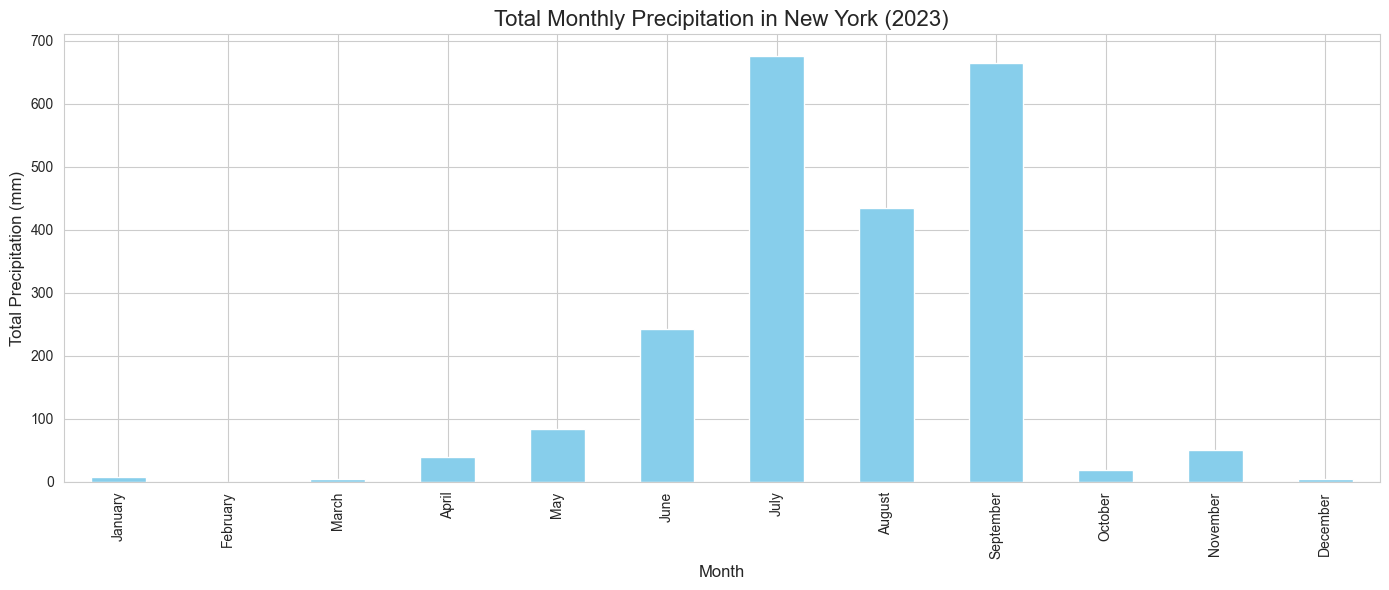

In [10]:
# Plot monthly precipitation totals
plt.figure(figsize=(14, 6))
monthly_precip['precip']['sum'].plot(kind='bar', color='skyblue')
plt.title('Total Monthly Precipitation in New York (2023)')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

/var/folders/vd/cd4zmcw90v70cv08nvjpv1kr0000gn/T/ipykernel_39620/1602945556.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=precip_types, palette='viridis')


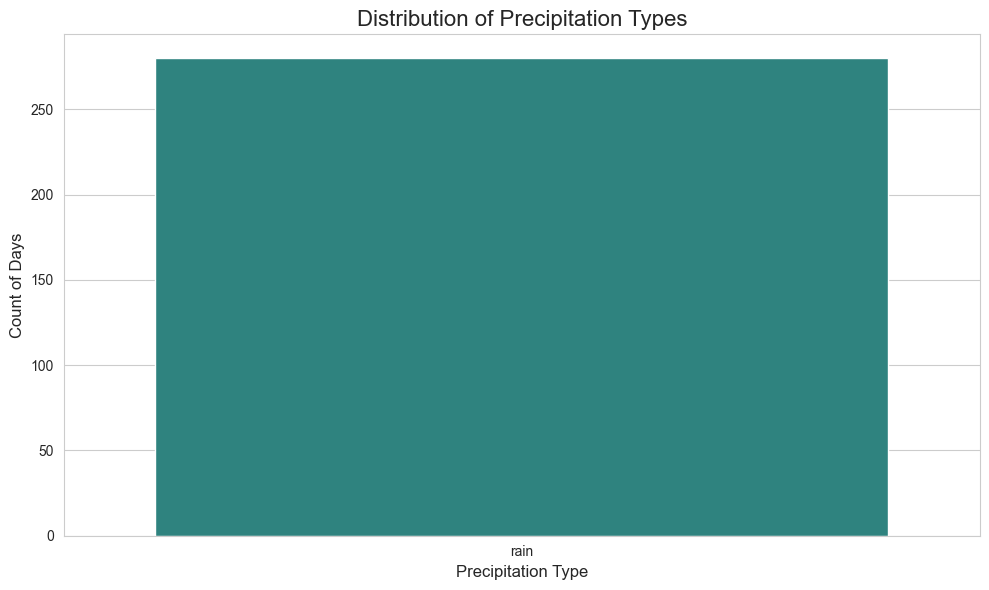

In [11]:
# Precipitation type distribution
# Create a counts table for preciptype
precip_types = df['preciptype'].value_counts().reset_index()
precip_types.columns = ['Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', data=precip_types, palette='viridis')
plt.title('Distribution of Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Count of Days')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 4. Weather Conditions Analysis

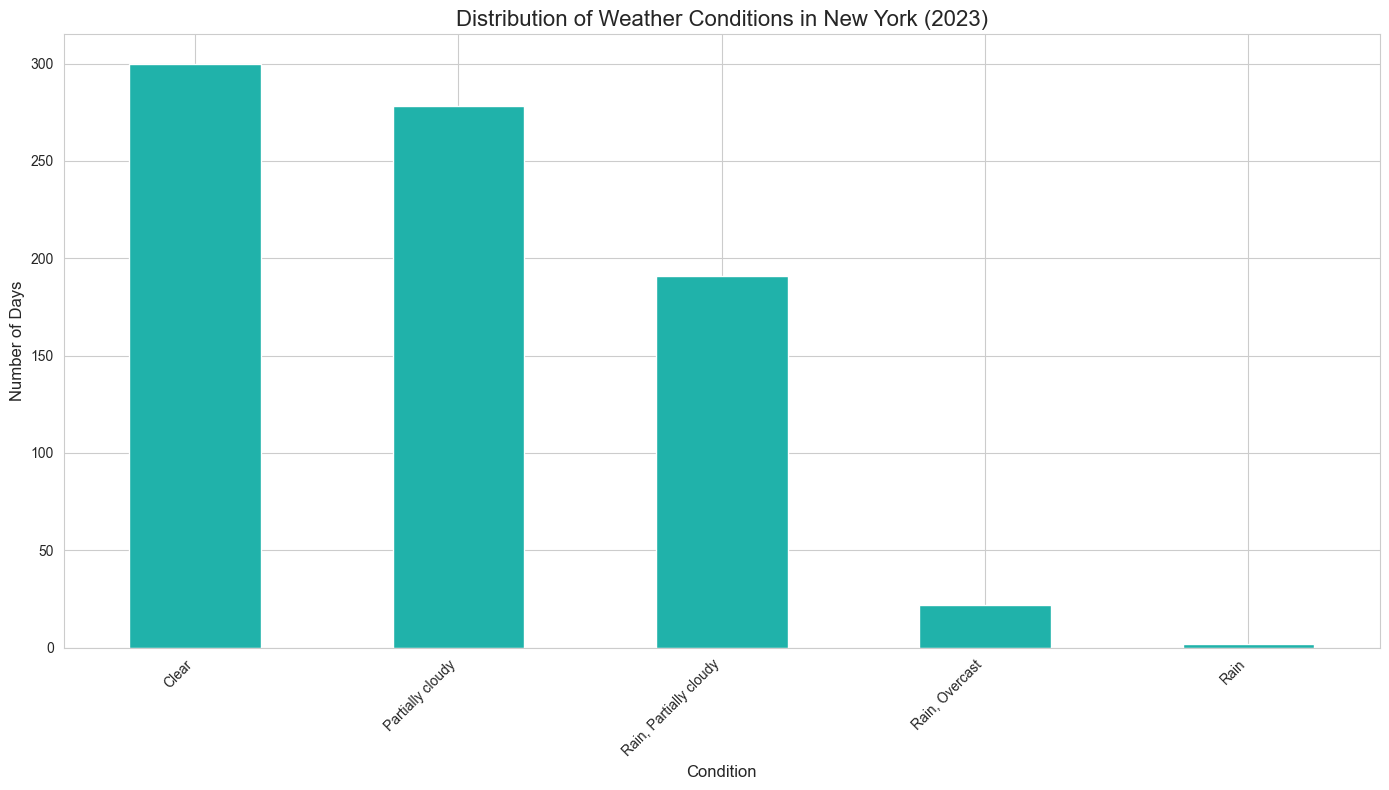

In [12]:
# Distribution of weather conditions
plt.figure(figsize=(14, 8))
condition_counts = df['conditions'].value_counts()
condition_counts.plot(kind='bar', color='lightseagreen')
plt.title('Distribution of Weather Conditions in New York (2023)')
plt.xlabel('Condition')
plt.ylabel('Number of Days')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

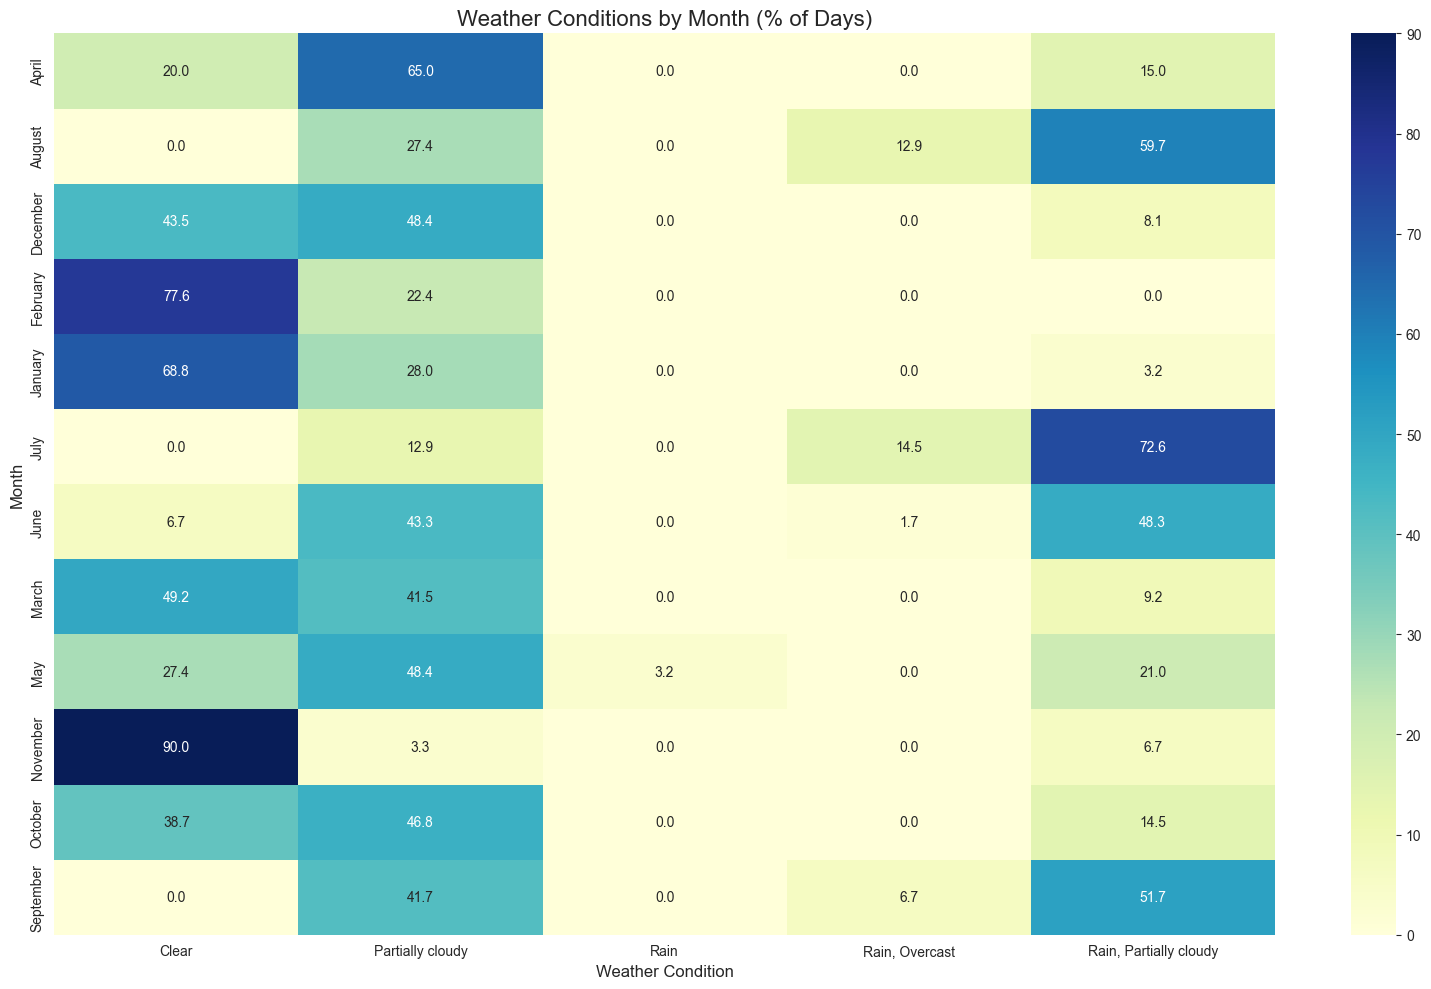

In [13]:
# Weather conditions by month
# Create a cross-tabulation of month vs conditions
df['month_name'] = df['datetime'].dt.strftime('%B')
monthly_conditions = pd.crosstab(df['month_name'], df['conditions'])

# Convert to percentages
monthly_conditions_pct = monthly_conditions.div(monthly_conditions.sum(axis=1), axis=0) * 100

# Plot as a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(monthly_conditions_pct, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Weather Conditions by Month (% of Days)')
plt.xlabel('Weather Condition')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

## 5. Wind and Humidity Analysis

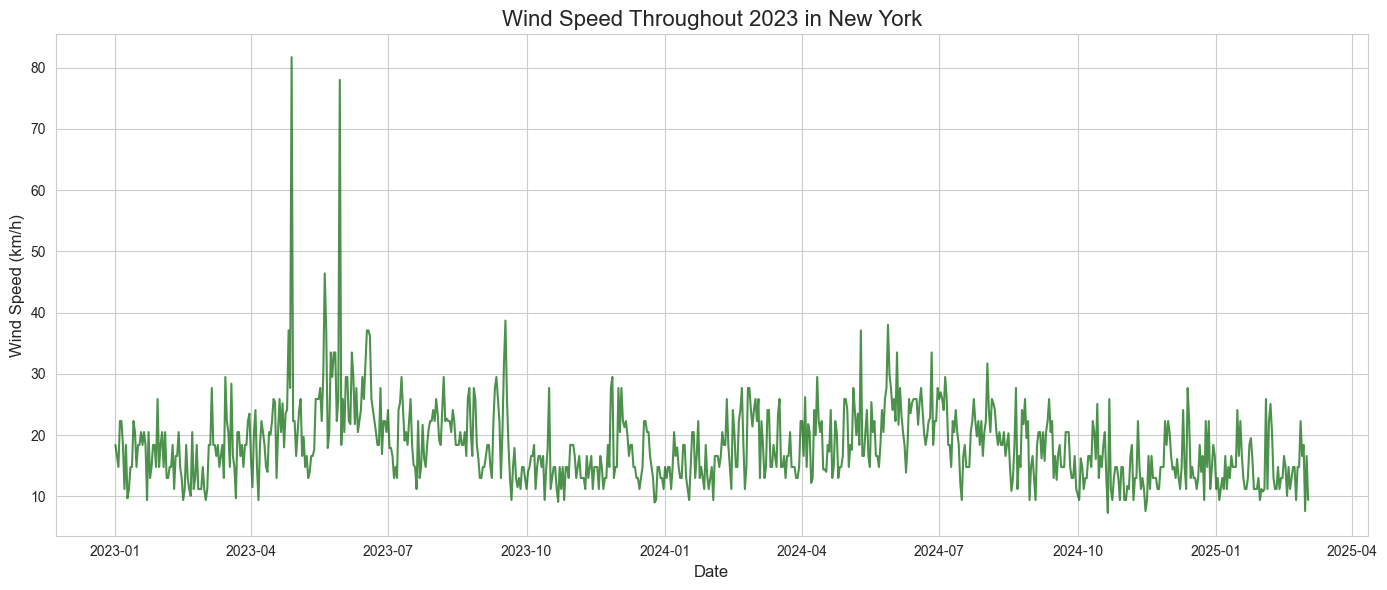

In [14]:
# Wind speed throughout the year
plt.figure(figsize=(14, 6))
plt.plot(df['datetime'], df['windspeed'], color='darkgreen', alpha=0.7)
plt.title('Wind Speed Throughout 2023 in New York')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)
plt.tight_layout()
plt.show()

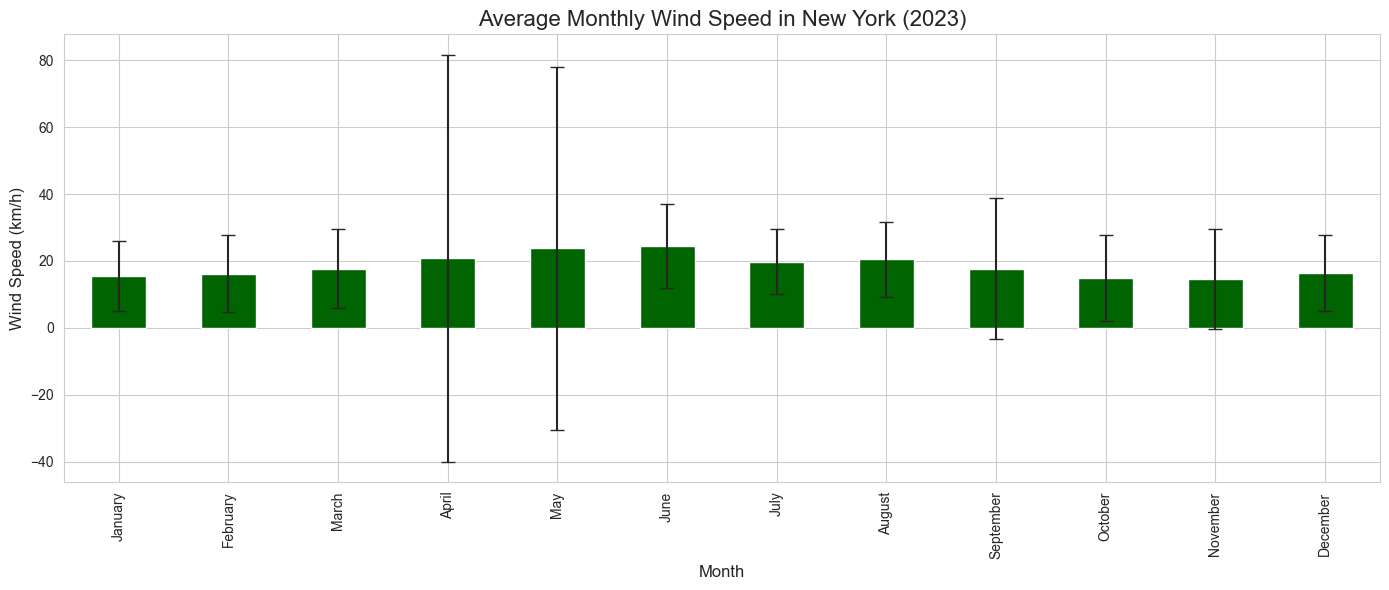

In [15]:
# Monthly wind speed statistics
monthly_wind = df.groupby('month').agg({
    'windspeed': ['mean', 'min', 'max']
})

# Convert month numbers to names
monthly_wind.index = [calendar.month_name[m] for m in monthly_wind.index]

# Create a bar plot
plt.figure(figsize=(14, 6))
monthly_wind['windspeed']['mean'].plot(kind='bar', yerr=monthly_wind['windspeed']['max'] - monthly_wind['windspeed']['mean'], 
                                      color='darkgreen', capsize=5)
plt.title('Average Monthly Wind Speed in New York (2023)')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

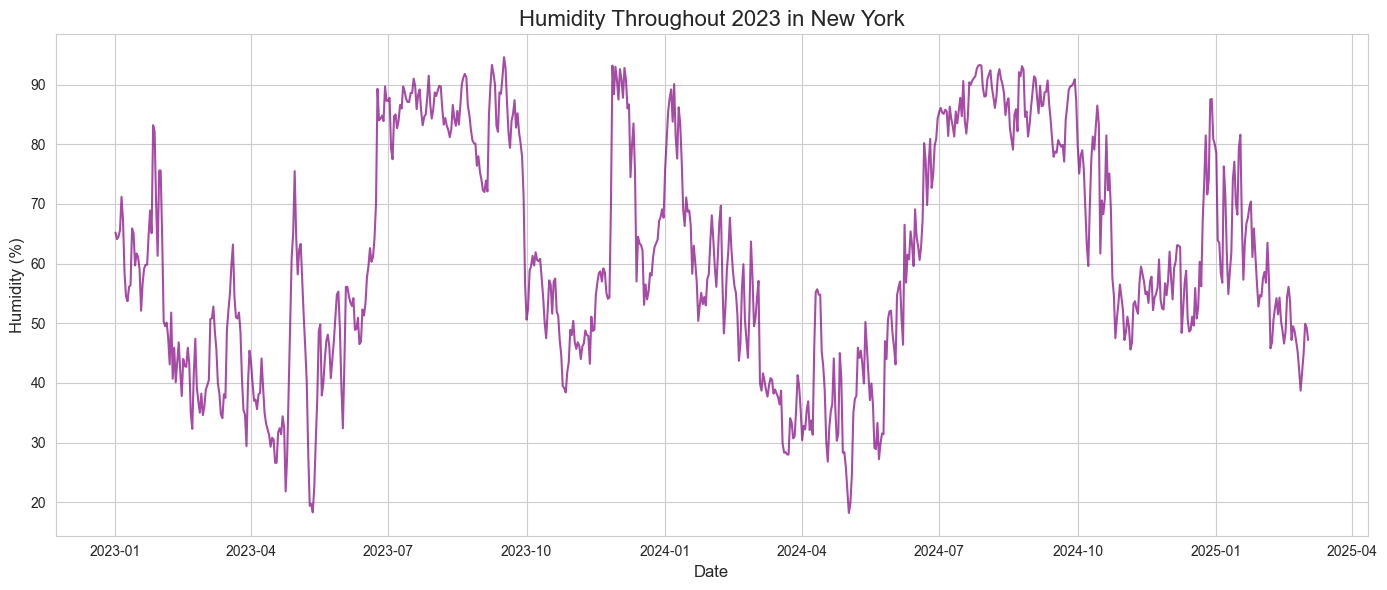

In [16]:
# Humidity throughout the year
plt.figure(figsize=(14, 6))
plt.plot(df['datetime'], df['humidity'], color='purple', alpha=0.7)
plt.title('Humidity Throughout 2023 in New York')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

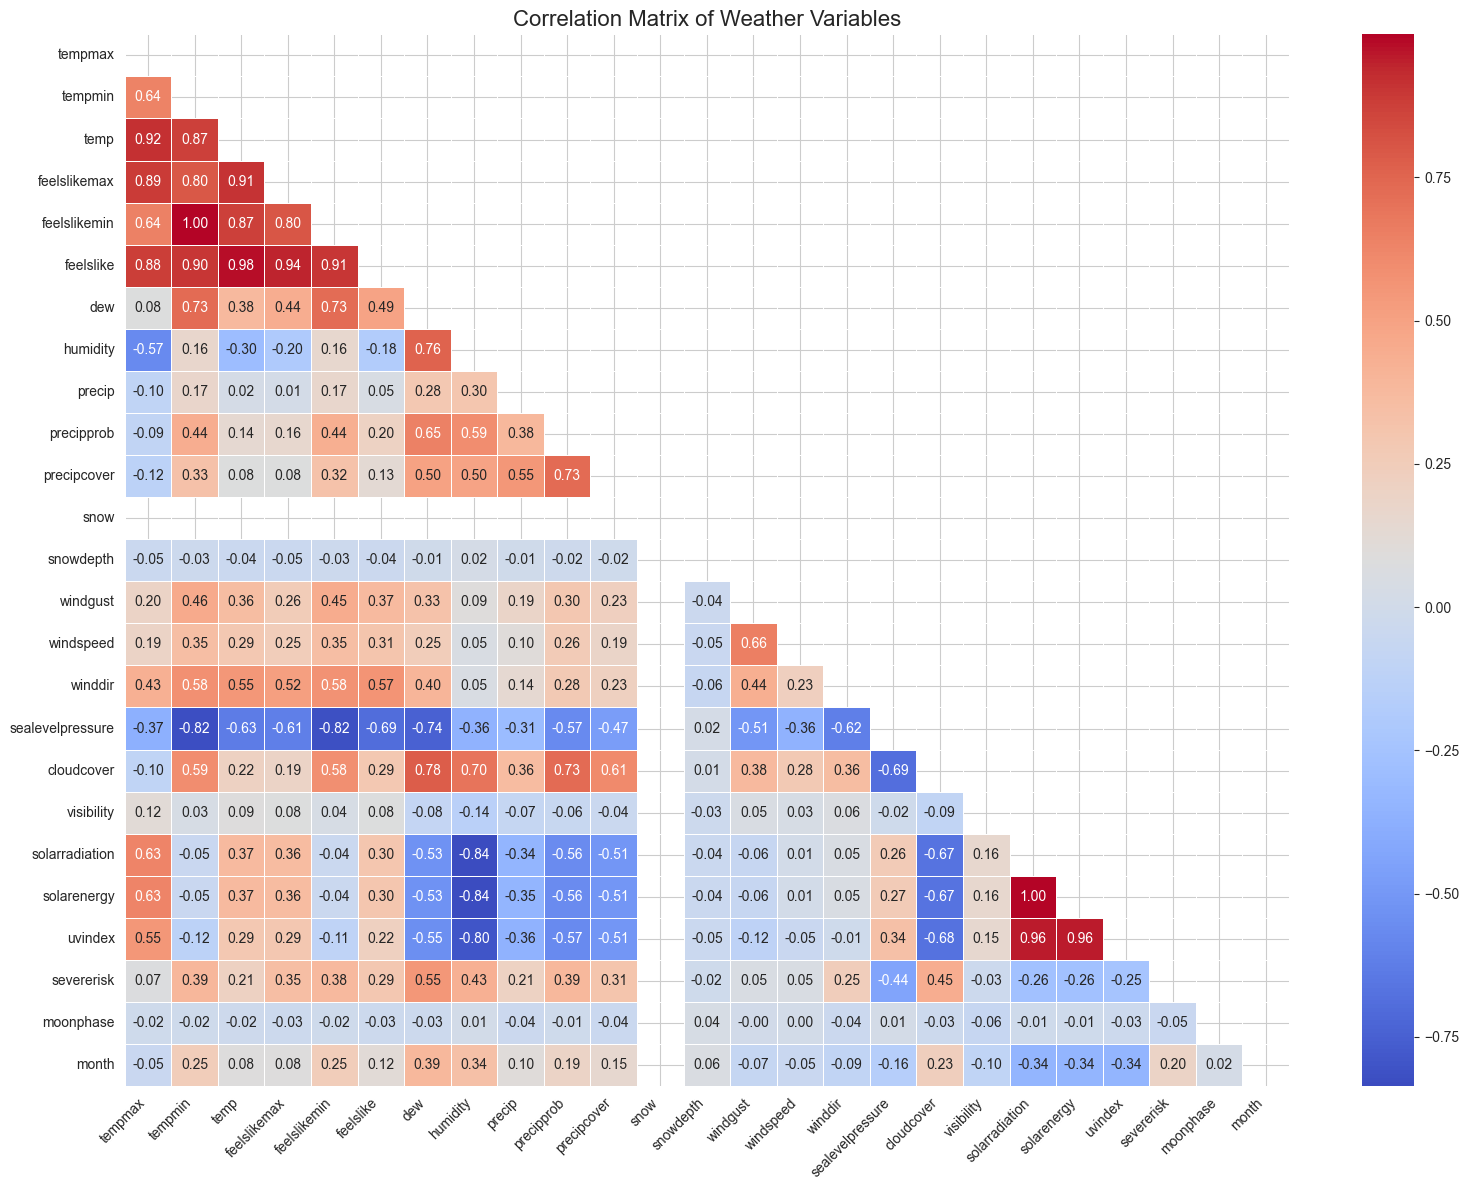

In [17]:
# Correlation matrix for numerical variables
plt.figure(figsize=(16, 12))
numerical_df = df.select_dtypes(include=[np.number])
correlation = numerical_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

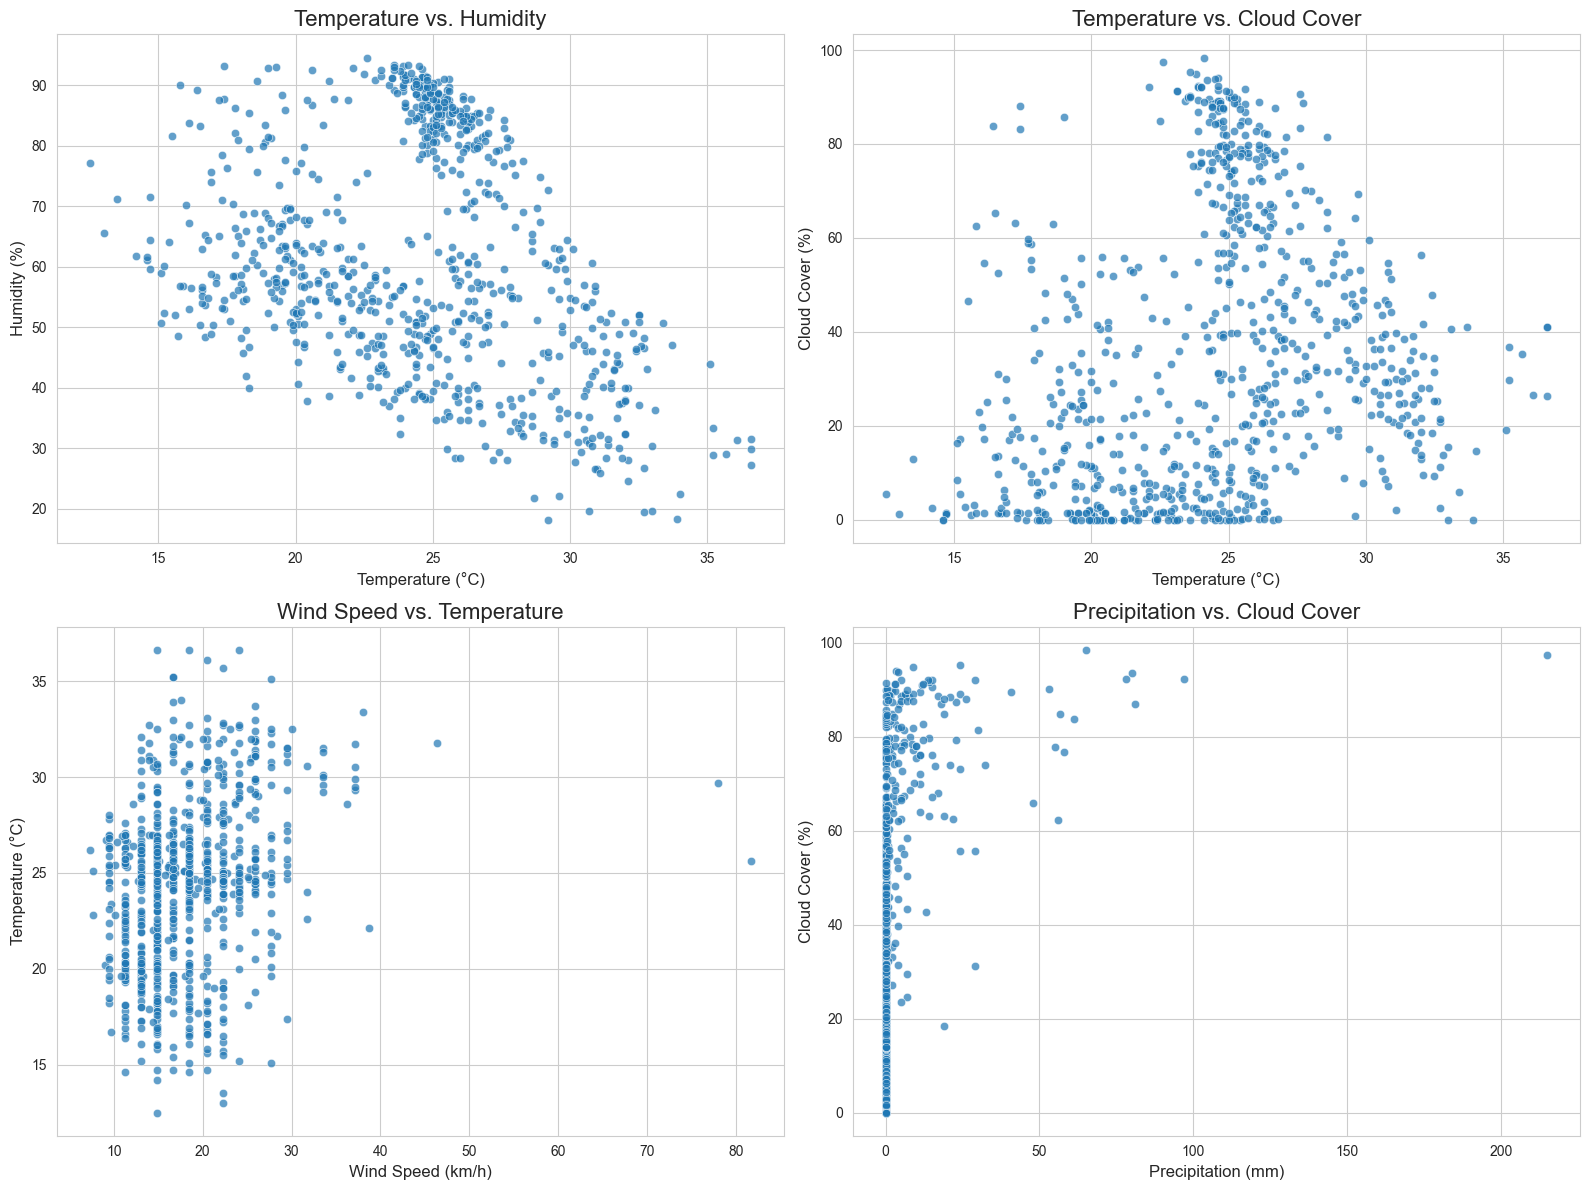

In [18]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Temperature vs. Humidity
sns.scatterplot(x='temp', y='humidity', data=df, ax=axes[0, 0], alpha=0.7)
axes[0, 0].set_title('Temperature vs. Humidity')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Humidity (%)')

# Temperature vs. Cloud Cover
sns.scatterplot(x='temp', y='cloudcover', data=df, ax=axes[0, 1], alpha=0.7)
axes[0, 1].set_title('Temperature vs. Cloud Cover')
axes[0, 1].set_xlabel('Temperature (°C)')
axes[0, 1].set_ylabel('Cloud Cover (%)')

# Wind Speed vs. Temperature
sns.scatterplot(x='windspeed', y='temp', data=df, ax=axes[1, 0], alpha=0.7)
axes[1, 0].set_title('Wind Speed vs. Temperature')
axes[1, 0].set_xlabel('Wind Speed (km/h)')
axes[1, 0].set_ylabel('Temperature (°C)')

# Precipitation vs. Cloud Cover
sns.scatterplot(x='precip', y='cloudcover', data=df, ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title('Precipitation vs. Cloud Cover')
axes[1, 1].set_xlabel('Precipitation (mm)')
axes[1, 1].set_ylabel('Cloud Cover (%)')

plt.tight_layout()
plt.show()

## 7. Summary

In this exploratory data analysis, we've visualized various aspects of the weather data for New York in 2023:

1. Temperature patterns showed expected seasonal variations with highest temperatures in summer months.
2. Precipitation analysis revealed the distribution of rainfall throughout the year.
3. Weather conditions distribution showed the most common weather patterns.
4. Wind speed and humidity patterns were analyzed across months.
5. Correlation analysis identified relationships between different weather variables.

These visualizations provide valuable insights into the weather patterns that may influence traffic conditions. The next step will be feature engineering in the `WeatherData_Transformation.ipynb` notebook.